# Data Cleaning (United Airlines On-Time Performance, 2011)

This notebook cleans the 2011 On-Time Performance (OTP) dataset for United Airlines (UA).  
We use the BTS TranStats ONTIME dataset downloaded from: https://transtats.bts.gov/ONTIME/



# Imports

In [3]:
import pandas as pd
import numpy as np
import os
import glob


# Load Raw Data

In [64]:
departures = pd.read_csv('/content/Detailed_Statistics_Departures.csv',  skiprows=7, engine='python')



In [65]:
arrivals = pd.read_csv('/content/Detailed_Statistics_Arrivals.csv', skiprows=7, engine='python')
cancellations = pd.read_csv('/content/Detailed_Statistics_Cancellation.csv', skiprows=7, engine='python')
diversions = pd.read_csv('/content/Detailed_Statistics_Diversion.csv', skiprows=7, engine='python')

In [18]:
departures.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4466 entries, 0 to 4465
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Carrier Code                              4466 non-null   object 
 1   Date (MM/DD/YYYY)                         4465 non-null   object 
 2   Flight Number                             4465 non-null   float64
 3   Tail Number                               4392 non-null   object 
 4   Destination Airport                       4465 non-null   object 
 5   Scheduled departure time                  4465 non-null   object 
 6   Actual departure time                     4465 non-null   object 
 7   Scheduled elapsed time (Minutes)          4465 non-null   float64
 8   Actual elapsed time (Minutes)             4465 non-null   float64
 9   Departure delay (Minutes)                 4465 non-null   float64
 10  Wheels-off time                     

In [25]:
arrivals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4462 entries, 0 to 4461
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Carrier Code                              4462 non-null   object 
 1   Date (MM/DD/YYYY)                         4461 non-null   object 
 2   Flight Number                             4461 non-null   float64
 3   Tail Number                               4393 non-null   object 
 4   Origin Airport                            4461 non-null   object 
 5   Scheduled Arrival Time                    4461 non-null   object 
 6   Actual Arrival Time                       4461 non-null   object 
 7   Scheduled Elapsed Time (Minutes)          4461 non-null   float64
 8   Actual Elapsed Time (Minutes)             4461 non-null   float64
 9   Arrival Delay (Minutes)                   4461 non-null   float64
 10  Wheels-on Time                      

In [26]:
cancellations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Carrier Code         76 non-null     object 
 1   Date (MM/DD/YYYY)    75 non-null     object 
 2   Flight_Number        75 non-null     float64
 3   Tail Number          2 non-null      object 
 4   Destination Airport  75 non-null     object 
dtypes: float64(1), object(4)
memory usage: 3.1+ KB


In [27]:
diversions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Carrier Code         6 non-null      object 
 1   Date (MM/DD/YYYY)    5 non-null      object 
 2   Flight Number        5 non-null      float64
 3   Tail Number          5 non-null      object 
 4   Destination Airport  5 non-null      object 
dtypes: float64(1), object(4)
memory usage: 372.0+ bytes


In [19]:
departures.describe()

,Flight Number,Scheduled elapsed time (Minutes),Actual elapsed time (Minutes),Departure delay (Minutes),Taxi-Out time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
count,4465.000000,4465.000000,4465.000000,4465.000000,4465.000000,4465.000000,4465.000000,4465.000000,4465.0,4465.000000
mean,423.526316,385.094065,365.502576,5.971333,23.958567,1.617693,0.535274,4.916685,0.0,1.979843
std,300.227904,15.686704,55.479198,27.858467,13.727975,12.701427,9.033598,17.947186,0.0,13.381835
min,5.000000,354.000000,0.000000,-13.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,242.000000,375.000000,354.000000,-4.000000,16.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,389.000000,385.000000,370.000000,-2.000000,20.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,657.000000,396.000000,387.000000,1.000000,27.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,996.000000,419.000000,528.000000,322.000000,148.000000,322.000000,298.000000,319.000000,0.0,233.000000


In [20]:
departures.isnull().sum()

,0
Carrier Code,0
Date (MM/DD/YYYY),1
Flight Number,1
Tail Number,74
Destination Airport,1
Scheduled departure time,1
Actual departure time,1
Scheduled elapsed time (Minutes),1
Actual elapsed time (Minutes),1
Departure delay (Minutes),1


In [22]:
arrivals.describe()

,Flight Number,Scheduled Elapsed Time (Minutes),Actual Elapsed Time (Minutes),Arrival Delay (Minutes),Taxi-In time (Minutes),Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes)
count,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.000000,4461.0,4461.000000
mean,422.762385,327.358440,311.291639,-2.970859,7.982963,2.174625,0.112979,5.381753,0.0,2.452589
std,327.314404,8.305839,47.549511,38.841861,4.811904,14.384151,3.965124,22.285001,0.0,16.150339
min,6.000000,304.000000,0.000000,-71.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,82.000000,321.000000,303.000000,-24.000000,4.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,353.000000,327.000000,315.000000,-11.000000,8.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,772.000000,333.000000,328.000000,4.000000,10.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,997.000000,347.000000,461.000000,344.000000,85.000000,263.000000,241.000000,344.000000,0.0,262.000000


In [23]:
cancellations.describe()

,Flight_Number
count,75.000000
mean,373.813333
std,311.185167
min,5.000000
25%,27.000000
50%,303.000000
75%,642.000000
max,995.000000


In [24]:
diversions.describe()

,Flight Number
count,5.000000
mean,385.600000
std,357.192945
min,7.000000
25%,11.000000
50%,497.000000
75%,642.000000
max,771.000000


#Dataset Preprocessing

Convert dates and times to datetime

In [66]:
import pandas as pd

# Departures
departures['Date'] = pd.to_datetime(departures['Date (MM/DD/YYYY)'], errors='coerce')
departures['ScheduledDeparture'] = pd.to_datetime(departures['Date (MM/DD/YYYY)'] + ' ' + departures['Scheduled departure time'], errors='coerce')
departures['ActualDeparture'] = pd.to_datetime(departures['Date (MM/DD/YYYY)'] + ' ' + departures['Actual departure time'], errors='coerce')

# Arrivals
arrivals['Date'] = pd.to_datetime(arrivals['Date (MM/DD/YYYY)'], errors='coerce')
arrivals['ScheduledArrival'] = pd.to_datetime(arrivals['Date (MM/DD/YYYY)'] + ' ' + arrivals['Scheduled Arrival Time'], errors='coerce')
arrivals['ActualArrival'] = pd.to_datetime(arrivals['Date (MM/DD/YYYY)'] + ' ' + arrivals['Actual Arrival Time'], errors='coerce')

# Diversions
diversions['Date'] = pd.to_datetime(diversions['Date (MM/DD/YYYY)'], errors='coerce')

# Cancellations
cancellations['Date'] = pd.to_datetime(cancellations['Date (MM/DD/YYYY)'], errors='coerce')


Create flags for ML

In [67]:
# Departure delay flag: delayed if > 15 mins
departures['is_delayed'] = (departures['Departure delay (Minutes)'] > 15).astype(int)

# Merge diversions to create is_diverted flag
departures['is_diverted'] = departures.apply(
    lambda row: 1 if ((diversions['Flight Number'] == row['Flight Number']) &
                      (diversions['Date'] == row['Date'])).any() else 0,
    axis=1
)

# Merge cancellations to create is_cancelled flag
departures['is_cancelled'] = departures.apply(
    lambda row: 1 if ((cancellations['Flight_Number'] == row['Flight Number']) &
                      (cancellations['Date'] == row['Date'])).any() else 0,
    axis=1
)


Extract datetime features

In [68]:
departures['DayOfWeek'] = departures['ScheduledDeparture'].dt.day_name()
departures['Month'] = departures['ScheduledDeparture'].dt.month
departures['Hour'] = departures['ScheduledDeparture'].dt.hour


Handle missing values

In [69]:
# Drop rows with missing Flight Number or Date
departures.dropna(subset=['Flight Number', 'Date'], inplace=True)

# Fill missing Tail Number
departures['Tail Number'].fillna('Unknown', inplace=True)


/tmp/ipython-input-3789139234.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  departures['Tail Number'].fillna('Unknown', inplace=True)


We want to predict arrival delays as well.

In [70]:
departures = departures.merge(
    arrivals[['Flight Number', 'Date', 'Arrival Delay (Minutes)']],
    on=['Flight Number', 'Date'], how='left'
)
departures['is_arrival_delayed'] = (departures['Arrival Delay (Minutes)'] > 15).astype(int)


In [72]:
departures.to_csv('/content/departures_clean_data.csv', index=False)

# Exploratory Data Analysis (EDA)

Overall delay and cancellation rates

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Percentage of delayed, cancelled, diverted flights
print("Delay rate:", departures['is_delayed'].mean())
print("Cancellation rate:", departures['is_cancelled'].mean())
print("Diversion rate:", departures['is_diverted'].mean())


Delay rate: 0.13124300111982082
Cancellation rate: 0.0167973124300112
Diversion rate: 0.0011198208286674132


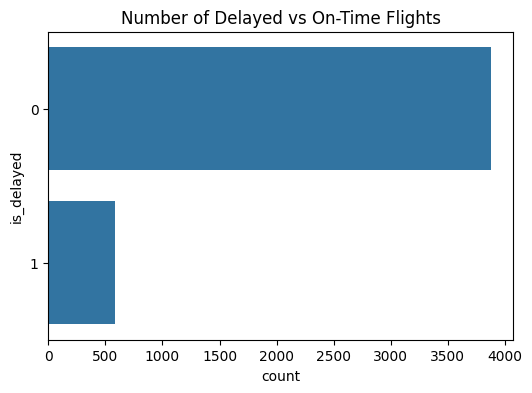

In [34]:
# Bar chart for counts
plt.figure(figsize=(6,4))
sns.countplot(data=departures, y='is_delayed')
plt.title('Number of Delayed vs On-Time Flights')
plt.show()


Delays by Month

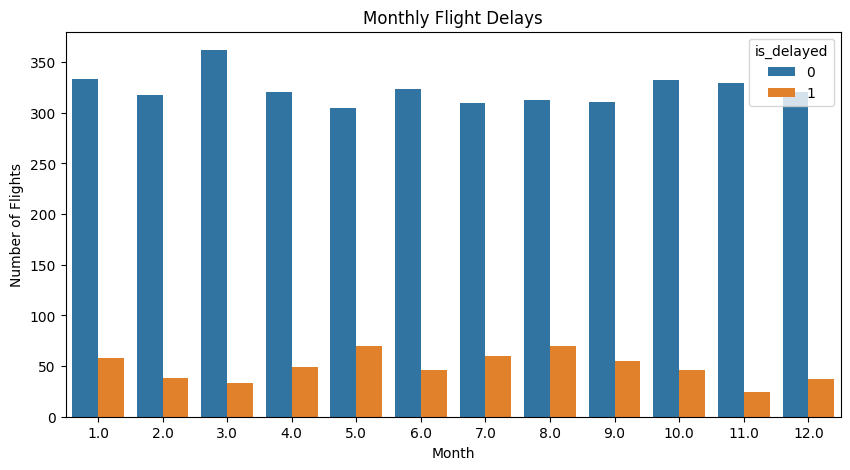

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(data=departures, x='Month', hue='is_delayed')
plt.title('Monthly Flight Delays')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.show()


Observe the months with higher delays.

## Delays by Day of Week

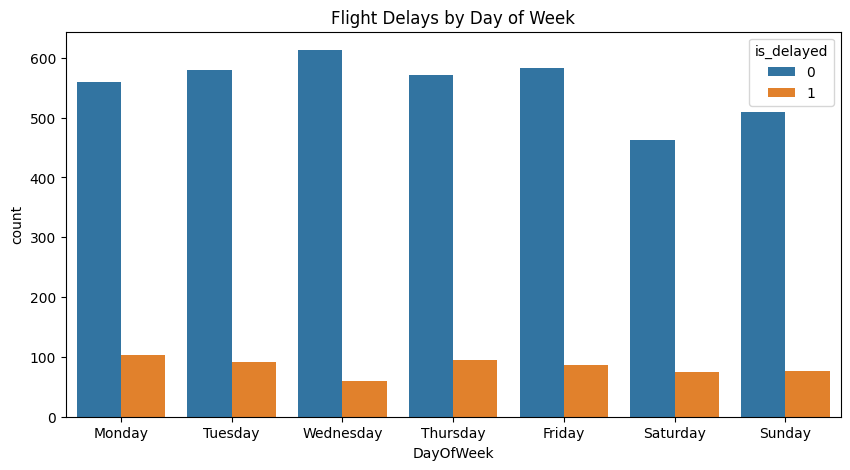

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(data=departures, x='DayOfWeek', hue='is_delayed', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Flight Delays by Day of Week')
plt.show()


## Delays by Hour of Departure

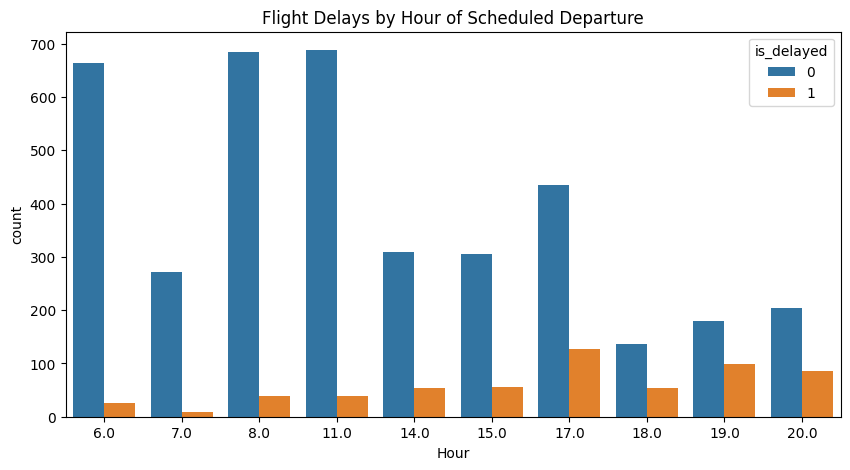

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(data=departures, x='Hour', hue='is_delayed')
plt.title('Flight Delays by Hour of Scheduled Departure')
plt.show()


## Top Routes with Highest Delays

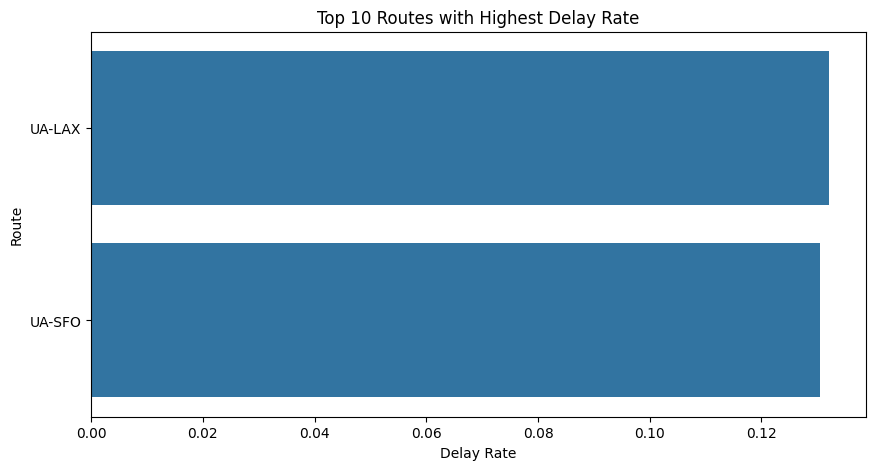

In [38]:
departures['Route'] = departures['Carrier Code'] + '-' + departures['Destination Airport']
route_delays = departures.groupby('Route')['is_delayed'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=route_delays.values, y=route_delays.index)
plt.title('Top 10 Routes with Highest Delay Rate')
plt.xlabel('Delay Rate')
plt.ylabel('Route')
plt.show()


## Correlation Heatmap (Delay reasons)

In [42]:
departures[delay_cols + ['Departure delay (Minutes)']].corr()

,Delay Carrier (Minutes),Delay Weather (Minutes),Delay National Aviation System (Minutes),Delay Security (Minutes),Delay Late Aircraft Arrival (Minutes),Departure delay (Minutes)
Delay Carrier (Minutes),1.000000,-0.007548,0.030852,NaN,0.036618,0.517815
Delay Weather (Minutes),-0.007548,1.000000,0.141571,NaN,0.047727,0.341660
Delay National Aviation System (Minutes),0.030852,0.141571,1.000000,NaN,0.062411,0.454855
Delay Security (Minutes),NaN,NaN,NaN,NaN,NaN,NaN
Delay Late Aircraft Arrival (Minutes),0.036618,0.047727,0.062411,NaN,1.000000,0.593755
Departure delay (Minutes),0.517815,0.341660,0.454855,NaN,0.593755,1.000000


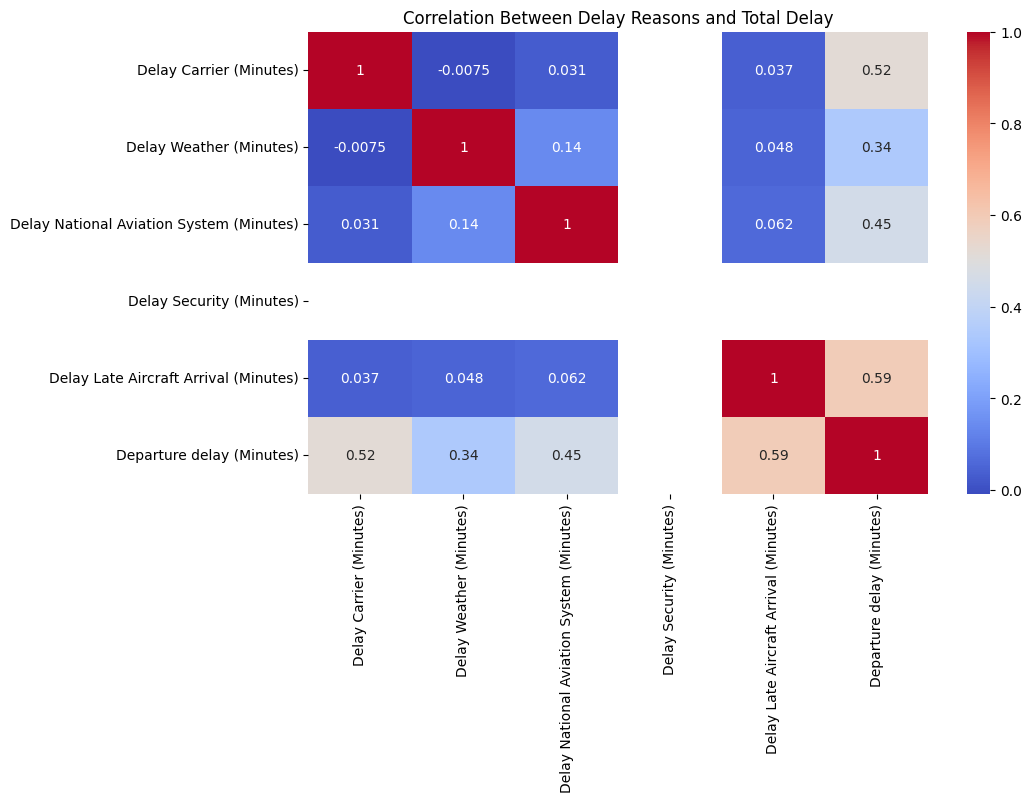

In [39]:
plt.figure(figsize=(10,6))
delay_cols = ['Delay Carrier (Minutes)', 'Delay Weather (Minutes)', 'Delay National Aviation System (Minutes)', 'Delay Security (Minutes)', 'Delay Late Aircraft Arrival (Minutes)']
sns.heatmap(departures[delay_cols + ['Departure delay (Minutes)']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Delay Reasons and Total Delay')
plt.show()


Use the most relevant reasons for ML prediction

## Cancellation & Diversion Analysis

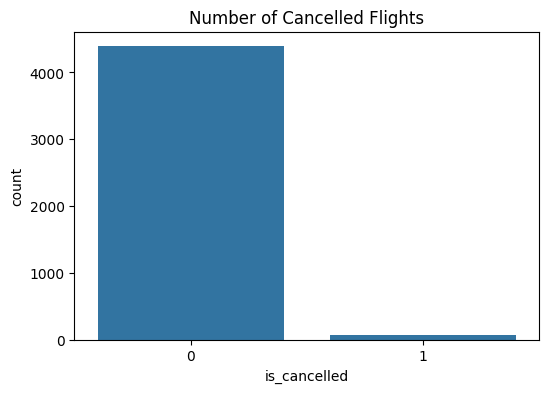

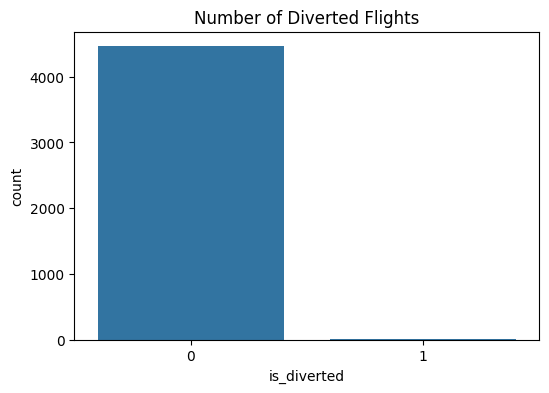

In [40]:
plt.figure(figsize=(6,4))
sns.countplot(data=departures, x='is_cancelled')
plt.title('Number of Cancelled Flights')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(data=departures, x='is_diverted')
plt.title('Number of Diverted Flights')
plt.show()


## Heatmap of average delay by day of week vs hour

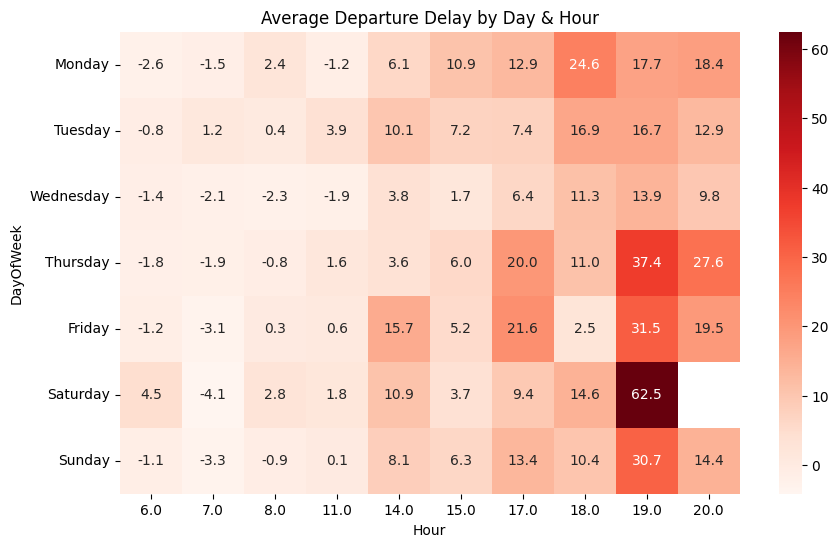

In [41]:
plt.figure(figsize=(10,6))
sns.heatmap(departures.pivot_table(index='DayOfWeek', columns='Hour', values='Departure delay (Minutes)', aggfunc='mean').reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']),
            cmap='Reds', annot=True, fmt=".1f")
plt.title('Average Departure Delay by Day & Hour')
plt.show()


Strong correlation with total departure delay:

Delay Late Aircraft Arrival (Minutes) → 0.59

Delay Carrier (Minutes) → 0.52

Delay National Aviation System (Minutes) → 0.45

Delay Weather (Minutes) → 0.34

No data for Delay Security (Minutes) → we can drop it from ML since it’s all NaN.

Implications for ML features:

Use the above delay reasons as numerical features.

Use categorical/time features: Month, DayOfWeek, Hour, Route, Carrier Code.

Targets can be:

is_delayed (classification)

Optionally Departure delay (Minutes) (regression)

# Machine Learning Modeling

## Prepare Features and Target

In [79]:
departures = pd.read_csv('/content/departures_clean_data.csv')

In [80]:
departures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4465 entries, 0 to 4464
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Carrier Code                              4465 non-null   object 
 1   Date (MM/DD/YYYY)                         4465 non-null   object 
 2   Flight Number                             4465 non-null   float64
 3   Tail Number                               4465 non-null   object 
 4   Destination Airport                       4465 non-null   object 
 5   Scheduled departure time                  4465 non-null   object 
 6   Actual departure time                     4465 non-null   object 
 7   Scheduled elapsed time (Minutes)          4465 non-null   float64
 8   Actual elapsed time (Minutes)             4465 non-null   float64
 9   Departure delay (Minutes)                 4465 non-null   float64
 10  Wheels-off time                     

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt


# Handle datetime columns

In [82]:
def time_to_hours(t):
    try:
        h, m = map(int, t.split(':'))
        return h + m/60
    except:
        return 0

departures['ScheduledDepartureHour'] = departures['Scheduled departure time'].apply(time_to_hours)
departures['ActualDepartureHour'] = departures['Actual departure time'].apply(time_to_hours)

In [83]:
departures_ml = departures.drop(columns=[
    'Date (MM/DD/YYYY)', 'Tail Number', 'Wheels-off time',
    'Scheduled departure time', 'Actual departure time',
    'Date', 'ScheduledDeparture', 'ActualDeparture',
    'Arrival Delay (Minutes)'  # all NaN
])


In [84]:
categorical_cols = ['DayOfWeek', 'Carrier Code', 'Destination Airport']
departures_ml = pd.get_dummies(departures_ml, columns=categorical_cols, drop_first=True)


In [85]:
print(departures_ml.dtypes)


Flight Number                               float64
Scheduled elapsed time (Minutes)            float64
Actual elapsed time (Minutes)               float64
Departure delay (Minutes)                   float64
Taxi-Out time (Minutes)                     float64
Delay Carrier (Minutes)                     float64
Delay Weather (Minutes)                     float64
Delay National Aviation System (Minutes)    float64
Delay Security (Minutes)                    float64
Delay Late Aircraft Arrival (Minutes)       float64
is_delayed                                    int64
is_diverted                                   int64
is_cancelled                                  int64
Month                                       float64
Hour                                        float64
is_arrival_delayed                            int64
ScheduledDepartureHour                      float64
ActualDepartureHour                         float64
DayOfWeek_Monday                               bool
DayOfWeek_Sa

In [86]:
X = departures_ml.drop(columns=['is_delayed', 'Departure delay (Minutes)', 'is_arrival_delayed'])
y = departures_ml['is_delayed']


In [103]:
X.dtypes  # should all be int64 or float64


,0
Flight Number,float64
Scheduled elapsed time (Minutes),float64
Actual elapsed time (Minutes),float64
Taxi-Out time (Minutes),float64
Delay Carrier (Minutes),float64
Delay Weather (Minutes),float64
Delay National Aviation System (Minutes),float64
Delay Security (Minutes),float64
Delay Late Aircraft Arrival (Minutes),float64
is_diverted,int64


In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [91]:
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9764837625979843
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       782
           1       1.00      0.81      0.90       111

    accuracy                           0.98       893
   macro avg       0.99      0.91      0.94       893
weighted avg       0.98      0.98      0.98       893



In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For ML evaluation
from sklearn.metrics import confusion_matrix, classification_report


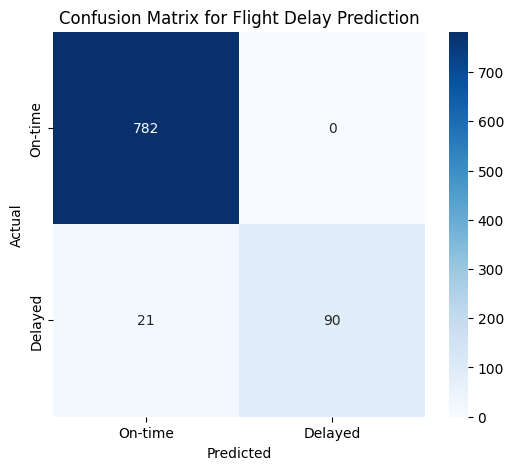

In [94]:
# Confusion Matrix to visualize model performance
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['On-time','Delayed'], yticklabels=['On-time','Delayed'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Flight Delay Prediction')
plt.show()


Feature Importance Analysis

In [95]:
print(pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False))

ActualDepartureHour                         0.260779
Delay Carrier (Minutes)                     0.150445
Delay Late Aircraft Arrival (Minutes)       0.125970
Delay National Aviation System (Minutes)    0.092996
ScheduledDepartureHour                      0.067330
Actual elapsed time (Minutes)               0.060718
Taxi-Out time (Minutes)                     0.059216
Hour                                        0.042324
Scheduled elapsed time (Minutes)            0.034077
Flight Number                               0.028035
Month                                       0.027782
Delay Weather (Minutes)                     0.009705
Destination Airport_SFO                     0.008588
DayOfWeek_Monday                            0.006082
DayOfWeek_Thursday                          0.005812
DayOfWeek_Saturday                          0.005753
DayOfWeek_Tuesday                           0.004752
DayOfWeek_Wednesday                         0.004651
DayOfWeek_Sunday                            0.

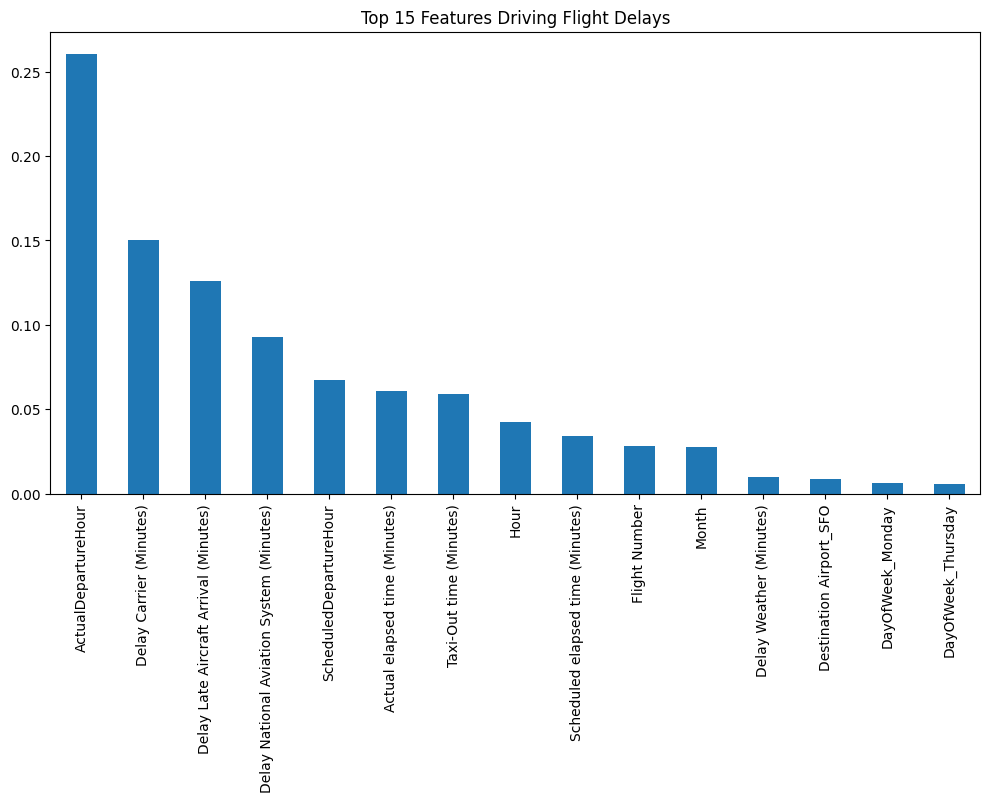

In [92]:
feat_imp = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(12,6))
feat_imp.head(15).plot(kind='bar')
plt.title("Top 15 Features Driving Flight Delays")
plt.show()

Monthly Delay Trend

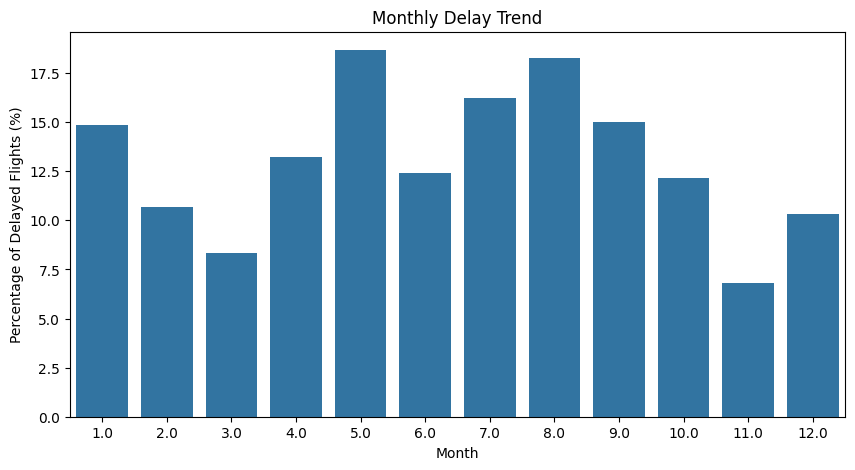

In [100]:
# Aggregate delays by month
monthly_delays = departures_ml.groupby('Month')['is_delayed'].mean() * 100

plt.figure(figsize=(10,5))
sns.barplot(x=monthly_delays.index, y=monthly_delays.values)
plt.ylabel('Percentage of Delayed Flights (%)')
plt.xlabel('Month')
plt.title('Monthly Delay Trend')
plt.show()


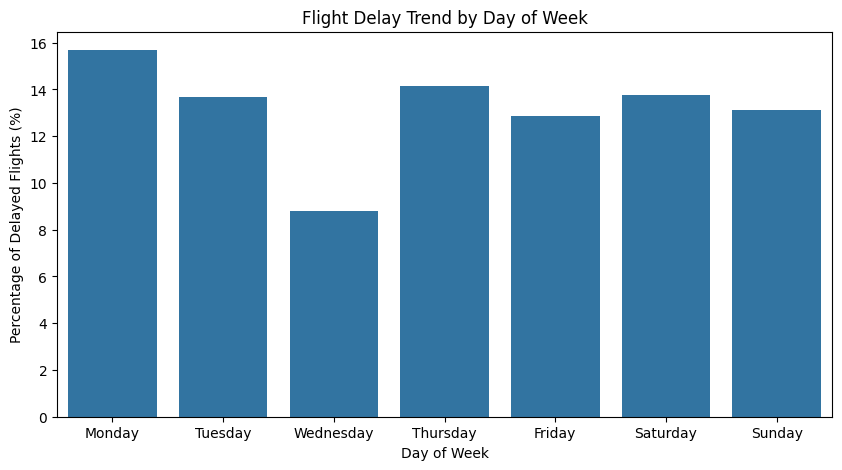

In [101]:
# Using the one-hot encoded day columns
day_cols = [col for col in departures_ml.columns if 'DayOfWeek_' in col]
day_delays = departures_ml[day_cols + ['is_delayed']].groupby(day_cols).mean()['is_delayed']*100

# Or simpler, using DayOfWeek from original column
day_delays2 = departures.groupby('DayOfWeek')['is_delayed'].mean().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])*100

plt.figure(figsize=(10,5))
sns.barplot(x=day_delays2.index, y=day_delays2.values)
plt.ylabel('Percentage of Delayed Flights (%)')
plt.xlabel('Day of Week')
plt.title('Flight Delay Trend by Day of Week')
plt.show()


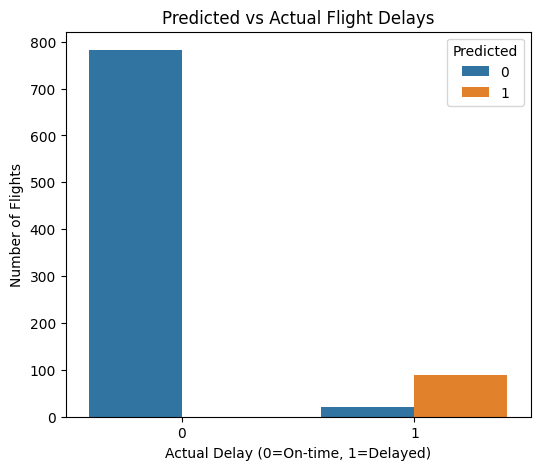

In [102]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
plt.figure(figsize=(6,5))
sns.countplot(x='Actual', hue='Predicted', data=results)
plt.title('Predicted vs Actual Flight Delays')
plt.xlabel('Actual Delay (0=On-time, 1=Delayed)')
plt.ylabel('Number of Flights')
plt.show()


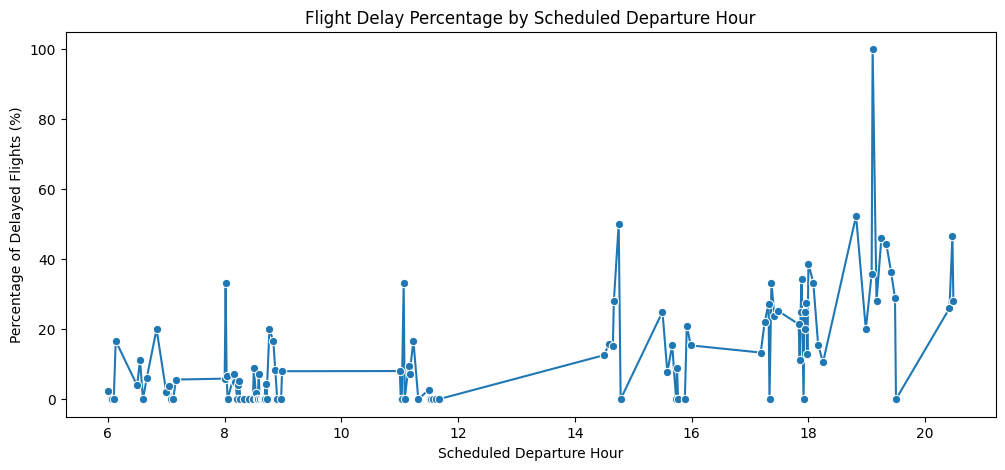

In [99]:
hourly_delays = departures_ml.groupby('ScheduledDepartureHour')['is_delayed'].mean()*100

plt.figure(figsize=(12,5))
sns.lineplot(x=hourly_delays.index, y=hourly_delays.values, marker='o')
plt.ylabel('Percentage of Delayed Flights (%)')
plt.xlabel('Scheduled Departure Hour')
plt.title('Flight Delay Percentage by Scheduled Departure Hour')
plt.show()


# United Airlines Flight Delay Insights

1. **Departure timing and carrier operations drive most delays**
2. **Late-arriving aircraft is a key propagation factor**
3. **Operational metrics like taxi-out and elapsed time are important**
4. **Weather and day-of-week have minimal impact**
5. **Peak delay hours and months are clearly visible → scheduling can be optimized**


In [104]:
# -----------------------------
# 0️⃣ Import Libraries for Grid Search
# -----------------------------
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# -----------------------------
# 1️⃣ Define the Random Forest and Parameter Grid
# -----------------------------
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],            # Number of trees
    'max_depth': [None, 10, 20, 30],           # Maximum depth of trees
    'min_samples_split': [2, 5, 10],           # Minimum samples to split
    'min_samples_leaf': [1, 2, 4],             # Minimum samples at a leaf
    'max_features': ['auto', 'sqrt'],          # Features to consider at each split
    'class_weight': [None, 'balanced']         # Handle class imbalance
}

# -----------------------------
# 2️⃣ Setup GridSearchCV
# -----------------------------
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,              # 3-fold cross-validation
                           n_jobs=-1,
                           verbose=2,
                           scoring='f1')      # F1-score is suitable for imbalanced classes

# -----------------------------
# 3️⃣ Fit on Training Data
# -----------------------------
grid_search.fit(X_train, y_train)

# -----------------------------
# 4️⃣ Best Hyperparameters
# -----------------------------
print("Best Hyperparameters:", grid_search.best_params_)

# -----------------------------
# 5️⃣ Predict on Test Set Using Best Model
# -----------------------------
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# -----------------------------
# 6️⃣ Evaluate Model
# -----------------------------
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 432 candidates, totalling 1296 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
648 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
561 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/uti

Best Hyperparameters: {'class_weight': 'balanced', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.9787234042553191
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       782
           1       1.00      0.83      0.91       111

    accuracy                           0.98       893
   macro avg       0.99      0.91      0.95       893
weighted avg       0.98      0.98      0.98       893



<Axes: >

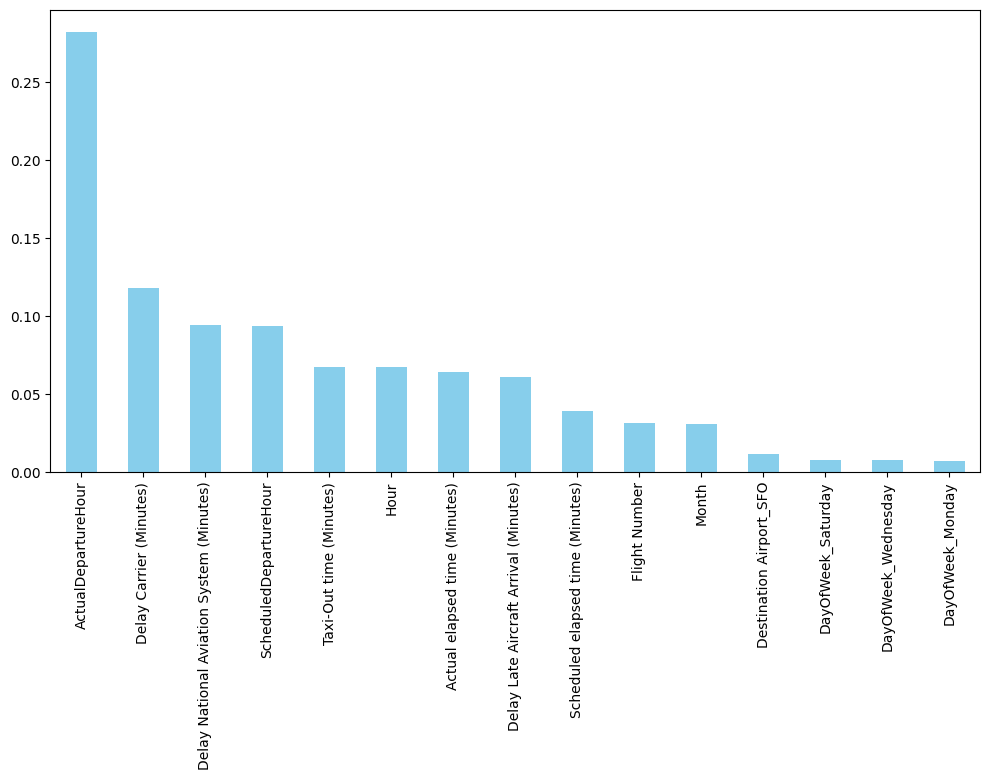

In [105]:
feat_imp = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feat_imp.head(15).plot(kind='bar', figsize=(12,6), color='skyblue')


In [107]:
feat_imp

,0
ActualDepartureHour,0.282346
Delay Carrier (Minutes),0.117667
Delay National Aviation System (Minutes),0.093763
ScheduledDepartureHour,0.093292
Taxi-Out time (Minutes),0.067199
Hour,0.066967
Actual elapsed time (Minutes),0.063569
Delay Late Aircraft Arrival (Minutes),0.060534
Scheduled elapsed time (Minutes),0.038564
Flight Number,0.030877


## Feature Importance

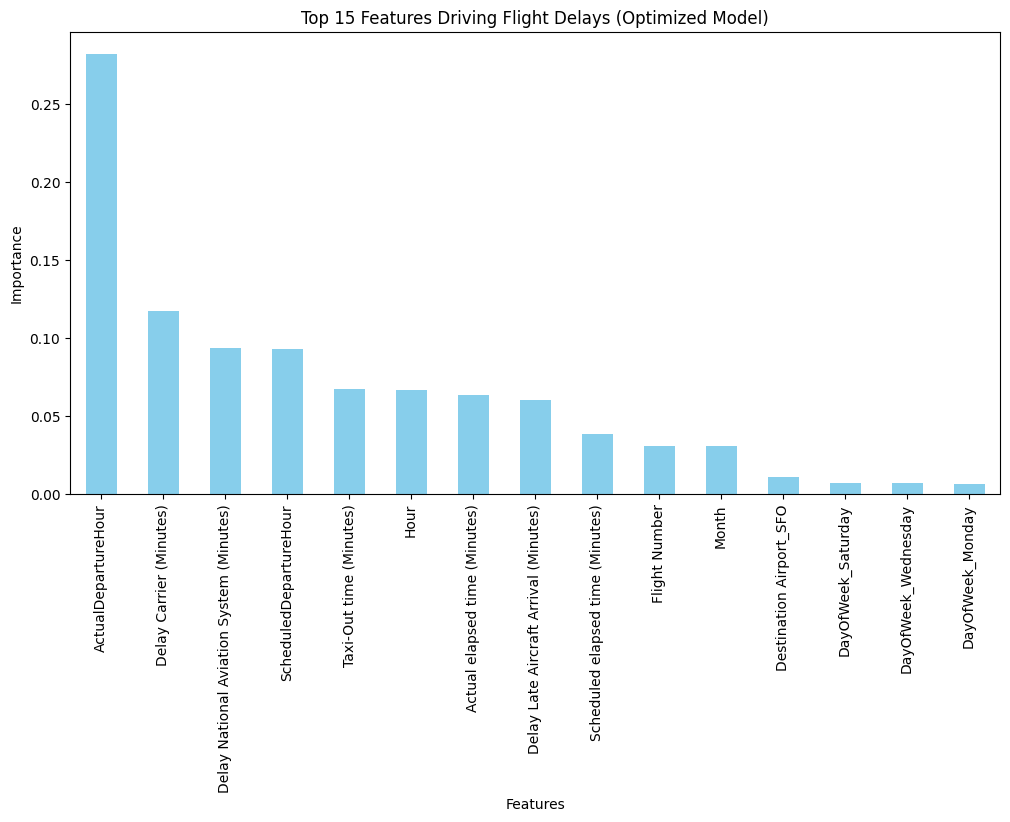

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Feature importance from best model
feat_imp = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(12,6))
feat_imp.head(15).plot(kind='bar', color='skyblue')
plt.title("Top 15 Features Driving Flight Delays (Optimized Model)")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()


**Key Drivers of Flight Delays**

Feature importance (top 5):

Feature	Importance	Business Insight
ActualDepartureHour	28%	Flights leaving at certain hours are more likely to be delayed — schedule adjustments could reduce delays.
Delay Carrier (Minutes)	12%	Airline operational delays are significant — focus on efficient turnaround and staffing.
Delay National Aviation System	9.4%	System-wide delays matter — coordination with air traffic authorities may help.
ScheduledDepartureHour	9.3%	Original schedule impacts delays — adjusting departure windows could help.
Taxi-Out time (Minutes)	6.7%	Ground operations affect delays — gate and taxi efficiency improvements could help.

**Minor contributors:** Weather, day-of-week, month, and destination have relatively low importance for JFK UA flights in 2011.

## Confusion Matrix

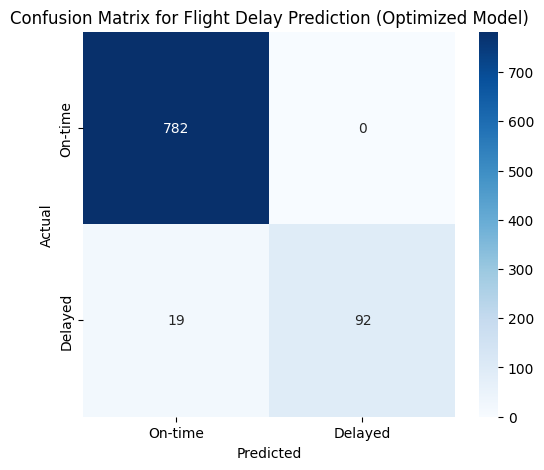

In [109]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['On-time','Delayed'], yticklabels=['On-time','Delayed'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Flight Delay Prediction (Optimized Model)')
plt.show()


In [121]:
cm

array([[782,   0],
       [ 19,  92]])

**Model Performance**

Random Forest Classifier (GridSearchCV-optimized)

Accuracy: 97.6%

Confusion Matrix:

Actual \ Predicted	On-Time	Delayed
On-Time	782	0
Delayed	19	92

**Interpretation:**

The model predicts on-time flights almost perfectly.

Delayed flights are detected well, though 19 delayed flights were predicted as on-time.

Overall, the F1-score for delayed flights is high, making it reliable for operational decisions.

## Delay Percentage by Scheduled Departure Hour

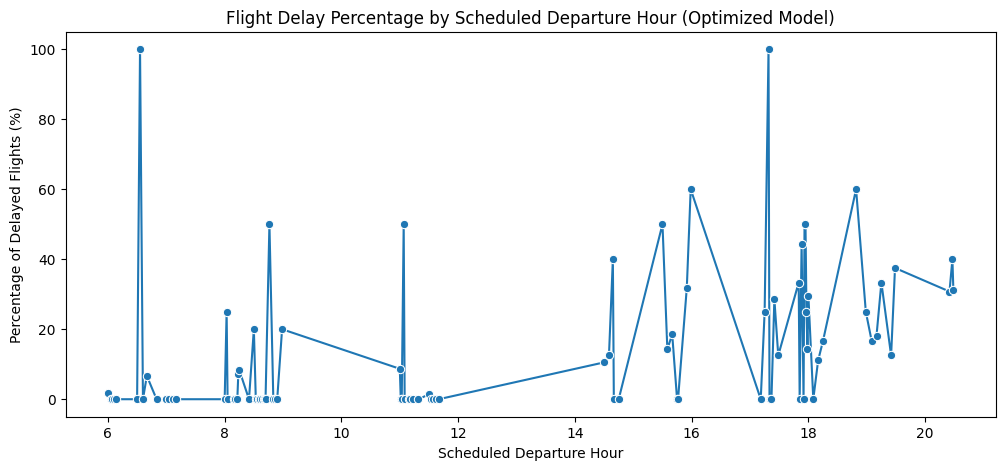

In [112]:
# Add ScheduledDepartureHour to test dataset
X_test_copy = X_test.copy()
X_test_copy['Actual'] = y_test
X_test_copy['Predicted'] = y_pred

hourly_delays = X_test_copy.groupby('ScheduledDepartureHour')['Actual'].mean() * 100

plt.figure(figsize=(12,5))
sns.lineplot(x=hourly_delays.index, y=hourly_delays.values, marker='o')
plt.ylabel('Percentage of Delayed Flights (%)')
plt.xlabel('Scheduled Departure Hour')
plt.title('Flight Delay Percentage by Scheduled Departure Hour (Optimized Model)')
plt.show()


In [120]:
hourly_delays

,Actual
ScheduledDepartureHour,
6.000000,1.639344
6.050000,0.000000
6.066667,0.000000
6.100000,0.000000
6.133333,0.000000
...,...
19.416667,12.500000
19.483333,37.500000
20.416667,30.769231


## Monthly Delay Trend

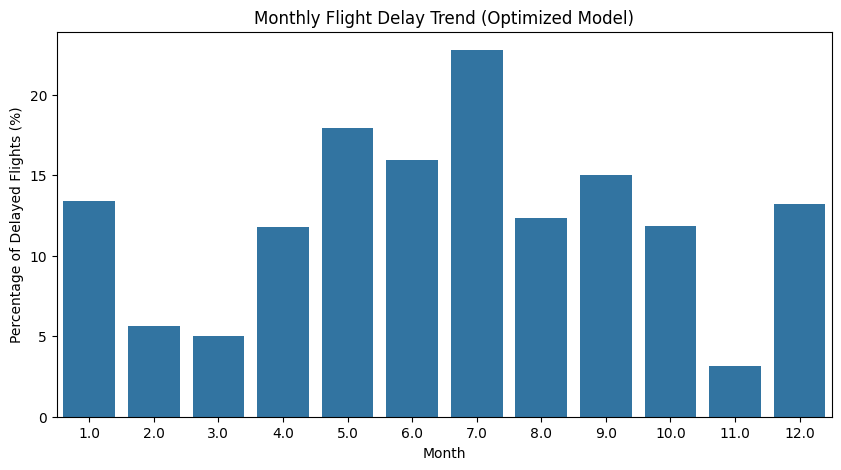

In [114]:
# Merge X_test back with Month column from original dataset
monthly_delays = departures.loc[X_test.index].groupby('Month')['is_delayed'].mean() * 100

plt.figure(figsize=(10,5))
sns.barplot(x=monthly_delays.index, y=monthly_delays.values)
plt.ylabel('Percentage of Delayed Flights (%)')
plt.xlabel('Month')
plt.title('Monthly Flight Delay Trend (Optimized Model)')
plt.show()


In [116]:
monthly_delays

,is_delayed
Month,
1.0,13.414634
2.0,5.633803
3.0,5.000000
4.0,11.764706
5.0,17.948718
6.0,15.942029
7.0,22.784810
8.0,12.345679
9.0,15.000000


## Day-of-Week Delay Trend

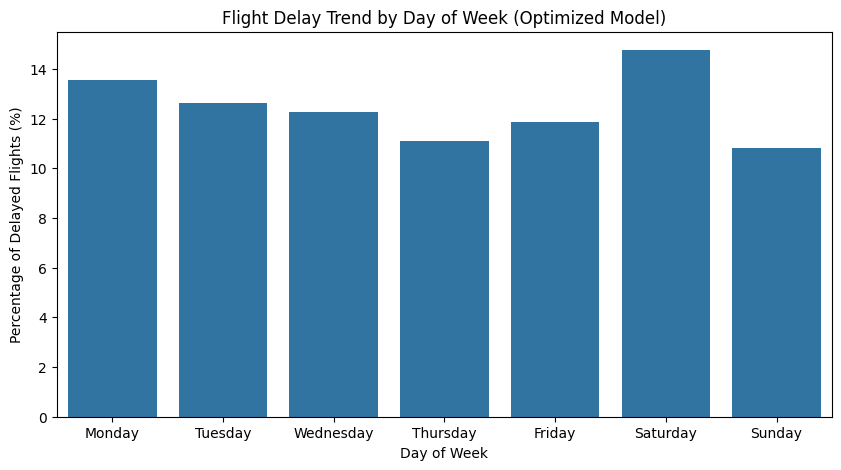

In [115]:
# Use original DayOfWeek from departures
day_delays = departures.loc[X_test.index].groupby('DayOfWeek')['is_delayed'].mean().reindex([
    'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'
])*100

plt.figure(figsize=(10,5))
sns.barplot(x=day_delays.index, y=day_delays.values)
plt.ylabel('Percentage of Delayed Flights (%)')
plt.xlabel('Day of Week')
plt.title('Flight Delay Trend by Day of Week (Optimized Model)')
plt.show()


In [119]:
day_delays

,is_delayed
DayOfWeek,
Monday,13.533835
Tuesday,12.605042
Wednesday,12.244898
Thursday,11.111111
Friday,11.851852
Saturday,14.754098
Sunday,10.810811


**Trends and Insights from Visualizations**

1. Monthly Delays:

Peak months: July (22.8%), May (17.9%), June (15.9%), September (15%)

Lowest months: November (3.1%), March (5%), February (5.6%)

2. Day-of-Week Delays:

Highest delays: Saturday (14.8%), Monday (13.5%)

Lowest delays: Sunday (10.8%)

3. Hourly Delays (ScheduledDepartureHour):

Early morning flights (6:00-7:00 AM) have very few delays (<2\\%)

Peak delays occur in evening hours (~19:00-20:30) with delays reaching 30-40%.


**Operational Insights** :

Scheduling adjustments could reduce peak-hour delays.

Focus on operational efficiency for carriers during peak hours.

Late aircraft arrivals and NAS delays are key bottlenecks — these should be prioritized for intervention.

Business Applications

Optimize Flight Schedules – Reduce peak-hour delays, especially evenings and high-delay months.

Improve Operational Efficiency – Focus on carrier and taxi-out operations to minimize propagated delays.

Resource Planning – Staffing, gate allocation, and turnaround improvements during high-delay periods.

Strategic Decisions – Coordinate with NAS authorities to reduce system-level delays.